<a href="https://colab.research.google.com/github/ANGELJSS/Modelo-predictivo-en-Recursos-Humanos/blob/main/00_JORGE_SALAZAR_ANGEL_PROYECTO1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción recursos humanos1

## Modelamiento

Angel Jorge Salazar | Analista de datos jr  @ Lutem First Capital
* Correo: angel.jorge@unmsm.edu.pe
* Linkedin https://www.linkedin.com/in/angel-jorge-salazar-7b3bb614b/

## Caso de uso: HR Analytics

<img src = "https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/hr_1920x480_s5WuoZs-thumbnail-1200x1200-90.jpg" alt="Flores" class="card-img-top">

Métrica de evaluación: Elegí analizar la metrica AUC(area bajo la curva ROC(`auc_score`)) y el f1_score
    

HR ANALYTICS CHALLENGE: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#LeaderBoard

## Importación de librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.__version__

'1.2.1'

In [ ]:
np.__version__

'1.19.5'

In [ ]:
sns.__version__

'0.11.1'

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [ ]:
seed = 2021

## Lectura de la  base de datos

In [ ]:
data_RH = pd.read_csv('D:\\ANGEL\\DMC\\Machine Learning Advanced\\MACHINE LEARNING ADVANCED _VIVO\\train.csv', sep = ",",index_col=0)

In [ ]:
data_RH.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [ ]:
data_RH.shape

(54808, 13)

In [ ]:
type(data_RH)

pandas.core.frame.DataFrame

In [ ]:
target = 'is_promoted'

In [ ]:
data_RH[target].value_counts()
### Donde:
# 0 nos indica: personas  no adecuadas para la promoción y prepararlas a tiempo
# 1 nos indica: personas adecuadas para la promoción y prepararlas a tiempo

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
data_RH[target].value_counts(normalize = True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

Observamos el target de forma gráfica

Text(0, 0.5, 'Numero de observaciones')

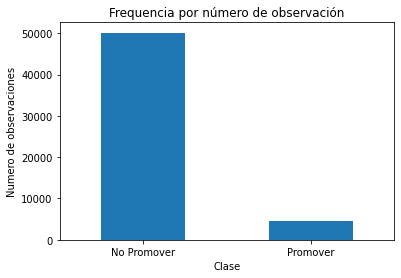

In [ ]:
### Observamos la frecuencia de los datos a predecir(class)###
LABELS =['No Promover','Promover']
count_classes = pd.value_counts(data_RH['is_promoted'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequencia por número de observación")
plt.xlabel("Clase")
plt.ylabel("Numero de observaciones")

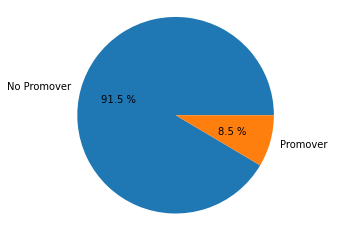

In [ ]:
# Observamos la etiqueta en porcentajes y en gráfico pastel
plt.pie(pd.value_counts(data_RH['is_promoted']), labels=LABELS, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

## División en conjuntos de entrenamiento y prueba

In [ ]:
X = data_RH.drop(target, axis =1)
y = data_RH[target]

In [ ]:
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [ ]:
y.head(2)

employee_id
65438    0
65141    0
Name: is_promoted, dtype: int64

In [ ]:
X.shape

(54808, 12)

In [ ]:
y.shape

(54808,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed

2021

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

In [ ]:
X_train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
53924,Sales & Marketing,region_6,Bachelor's,m,other,1,31,3.0,4,0,0,50
39112,Technology,region_7,Bachelor's,m,other,1,26,2.0,6,0,0,77


In [ ]:
X_test.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
30828,Finance,region_28,Bachelor's,m,sourcing,1,31,5.0,5,1,0,55
51784,Operations,region_19,Bachelor's,m,sourcing,1,45,4.0,19,0,0,57


In [ ]:
X_train.shape, X_test.shape

((43846, 12), (10962, 12))

In [ ]:
y_train.shape, y_test.shape

((43846,), (10962,))

In [ ]:
y.mean()

0.08517004816815063

In [ ]:
y_train.mean()

0.08516170232176254

In [ ]:
y_train.value_counts()

0    40112
1     3734
Name: is_promoted, dtype: int64

In [ ]:
y_test.mean()

0.08520343003101624

In [ ]:
y_test.value_counts()

0    10028
1      934
Name: is_promoted, dtype: int64

# Análisis exploratorio

Columnas del conjunto de datos

In [ ]:
X_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
53924,Sales & Marketing,region_6,Bachelor's,m,other,1,31,3.0,4,0,0,50
39112,Technology,region_7,Bachelor's,m,other,1,26,2.0,6,0,0,77
1741,Analytics,region_22,Bachelor's,m,sourcing,2,28,5.0,3,0,0,82
65100,Finance,region_28,Bachelor's,m,sourcing,2,29,2.0,5,0,0,58
72902,Technology,region_26,Bachelor's,m,sourcing,1,48,1.0,18,0,0,80


In [ ]:
y_train.head()

employee_id
53924    0
39112    0
1741     0
65100    0
72902    0
Name: is_promoted, dtype: int64

`columns`

In [ ]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

`info`

In [ ]:
X_train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43846 entries, 53924 to 76770
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            43846 non-null  object 
 1   region                43846 non-null  object 
 2   education             41934 non-null  object 
 3   gender                43846 non-null  object 
 4   recruitment_channel   43846 non-null  object 
 5   no_of_trainings       43846 non-null  int64  
 6   age                   43846 non-null  int64  
 7   previous_year_rating  40572 non-null  float64
 8   length_of_service     43846 non-null  int64  
 9   KPIs_met >80%         43846 non-null  int64  
 10  awards_won?           43846 non-null  int64  
 11  avg_training_score    43846 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 4.3+ MB


Podemos notar que existen valores nulos en 2 de nuestras variables 'education' y 'revious_year_rating'

`describe` `include`

In [ ]:
X_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,40572.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251471,34.805934,3.333284,5.871482,0.352894,0.023286,63.387150
std,0.609187,7.652666,1.259597,4.259109,0.477876,0.150812,13.374862
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [ ]:
X_train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,43846,43846,41934,43846,43846
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,13496,9806,29332,30782,24341


In [ ]:
X_train['department'].value_counts(dropna = False), X_train['region'].value_counts(dropna = False), X_train['education'].value_counts(dropna = False)

(Sales & Marketing    13496
 Operations            9094
 Procurement           5705
 Technology            5680
 Analytics             4308
 Finance               2021
 HR                    1908
 Legal                  833
 R&D                    801
 Name: department, dtype: int64, region_2     9806
 region_22    5172
 region_7     3863
 region_15    2270
 region_13    2113
 region_26    1823
 region_31    1522
 region_4     1355
 region_27    1350
 region_16    1181
 region_11    1068
 region_28    1051
 region_23     947
 region_29     792
 region_32     749
 region_20     680
 region_14     669
 region_25     665
 region_19     663
 region_17     630
 region_5      599
 region_6      557
 region_8      528
 region_30     528
 region_10     518
 region_1      502
 region_24     412
 region_12     401
 region_9      341
 region_21     325
 region_3      285
 region_34     244
 region_33     212
 region_18      25
 Name: region, dtype: int64, Bachelor's          29332
 Master's & abo

In [ ]:
X_train['gender'].value_counts(dropna = False), X_train['recruitment_channel'].value_counts(dropna = False)

(m    30782
 f    13064
 Name: gender, dtype: int64, other       24341
 sourcing    18574
 referred      931
 Name: recruitment_channel, dtype: int64)

### Exploramos las distribuciones y percentiles de las variables

<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

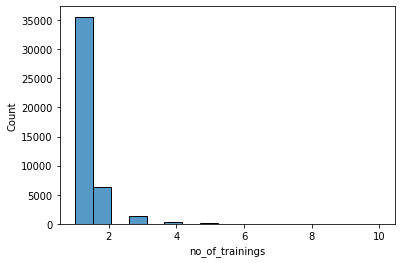

In [ ]:
sns.histplot(data = X_train, x = 'no_of_trainings')

<AxesSubplot:xlabel='age', ylabel='Count'>

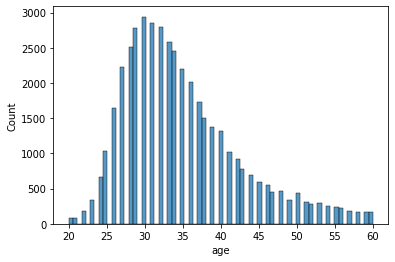

In [ ]:
sns.histplot(data = X_train, x = 'age')

<AxesSubplot:xlabel='previous_year_rating', ylabel='Count'>

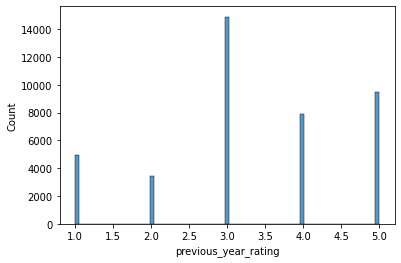

In [ ]:
sns.histplot(data = X_train, x = 'previous_year_rating')

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

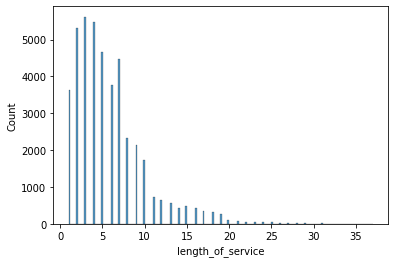

In [ ]:
sns.histplot(data = X_train, x = 'length_of_service')

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Count'>

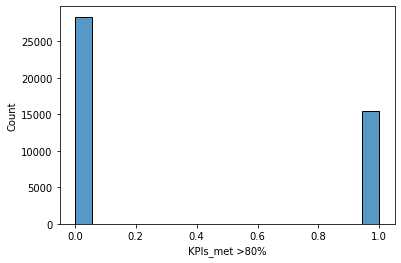

In [ ]:
sns.histplot(data = X_train, x = 'KPIs_met >80%')

<AxesSubplot:xlabel='awards_won?', ylabel='Count'>

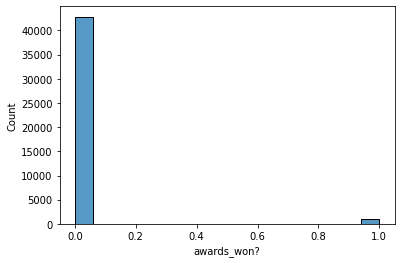

In [ ]:
sns.histplot(data = X_train, x = 'awards_won?')

<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

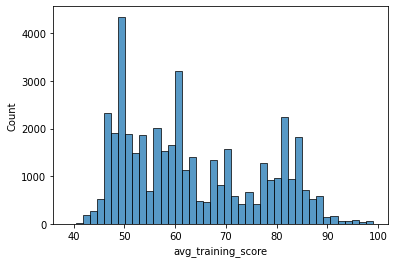

In [ ]:
sns.histplot(data = X_train, x = 'avg_training_score')

<AxesSubplot:xlabel='is_promoted', ylabel='no_of_trainings'>

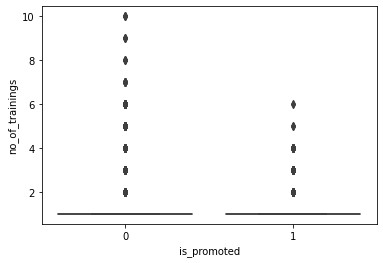

In [ ]:
sns.boxplot(data = data_RH, y = 'no_of_trainings', x = target)

<AxesSubplot:xlabel='gender', ylabel='count'>

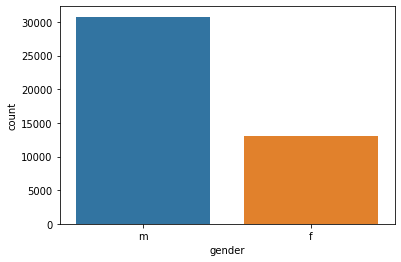

In [ ]:
sns.countplot(data = X_train, x = 'gender')

<AxesSubplot:xlabel='education', ylabel='count'>

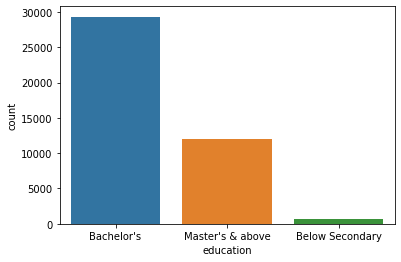

In [ ]:
sns.countplot(data = X_train, x = 'education')

In [ ]:
X_train['education'].value_counts(dropna = False)

Bachelor's          29332
Master's & above    11974
NaN                  1912
Below Secondary       628
Name: education, dtype: int64

In [ ]:
X_train.query("education == 'NaN'").head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,


In [ ]:
X_train[X_train['education']=='NaN']

# preprocesamiento

## Transformación de variables

In [ ]:
X_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
53924,Sales & Marketing,region_6,Bachelor's,m,other,1,31,3.0,4,0,0,50
39112,Technology,region_7,Bachelor's,m,other,1,26,2.0,6,0,0,77
1741,Analytics,region_22,Bachelor's,m,sourcing,2,28,5.0,3,0,0,82
65100,Finance,region_28,Bachelor's,m,sourcing,2,29,2.0,5,0,0,58
72902,Technology,region_26,Bachelor's,m,sourcing,1,48,1.0,18,0,0,80


## Tratamiento de valores nulos

Cantidad de valores nulos por columna

In [ ]:
X_train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
53924,Sales & Marketing,region_6,Bachelor's,m,other,1,31,3.0,4,0,0,50
39112,Technology,region_7,Bachelor's,m,other,1,26,2.0,6,0,0,77


In [ ]:
import missingno as msno

<AxesSubplot:>

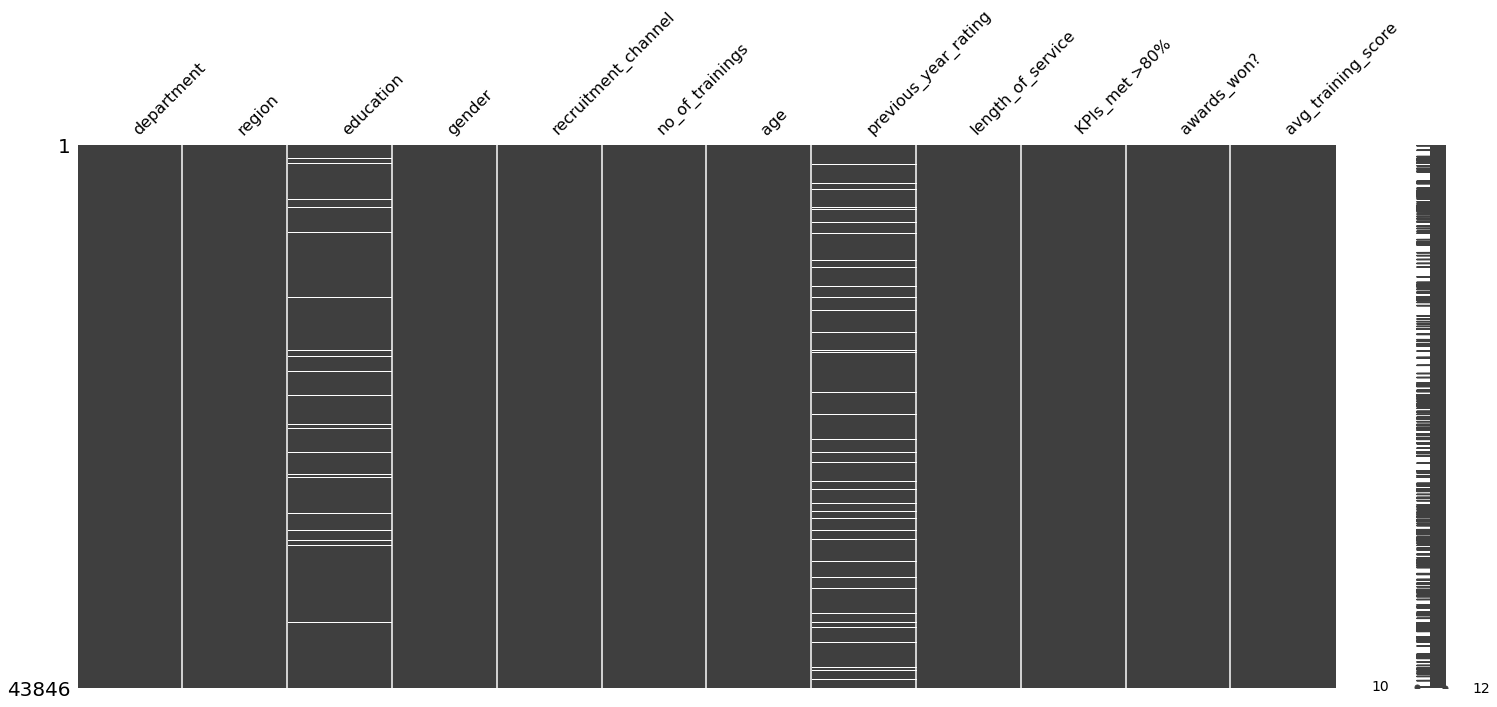

In [ ]:
#Corroboramos la existencia de variables nulos en 2 de nuestras variables
msno.matrix(X_train)

<AxesSubplot:>

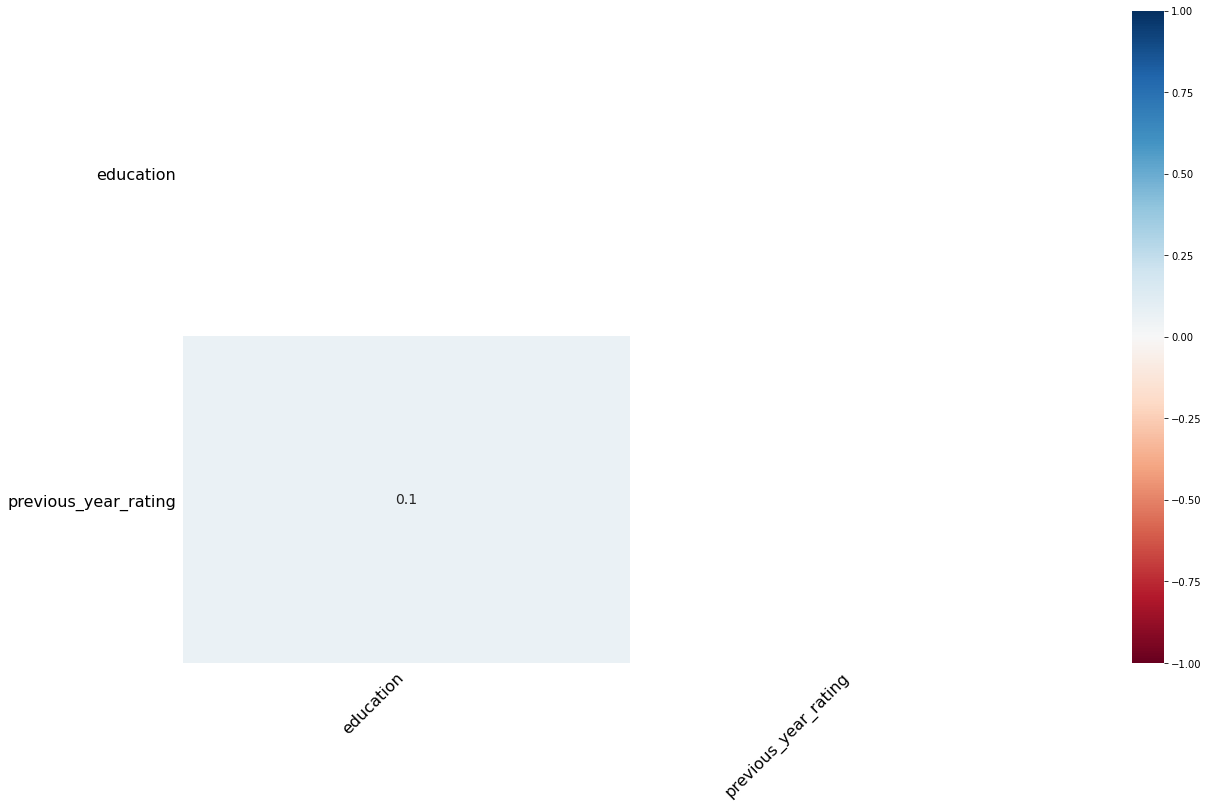

In [ ]:
msno.heatmap(X_train)

In [ ]:
X_train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
53924,Sales & Marketing,region_6,Bachelor's,m,other,1,31,3.0,4,0,0,50
39112,Technology,region_7,Bachelor's,m,other,1,26,2.0,6,0,0,77


In [ ]:
X_train.head(2).isnull()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
53924,False,False,False,False,False,False,False,False,False,False,False,False
39112,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Notamos la existencia de variables nulos en education(1912) y en previous_year_rating(3274)
X_train.isnull().sum()

department                 0
region                     0
education               1912
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3274
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Separamos las variables categóricas de las numéricas

In [ ]:
X_train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
53924,Sales & Marketing,region_6,Bachelor's,m,other,1,31,3.0,4,0,0,50
39112,Technology,region_7,Bachelor's,m,other,1,26,2.0,6,0,0,77


In [ ]:
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')

In [ ]:
X_train_cat.head(2)

,department,region,education,gender,recruitment_channel
employee_id,,,,,
53924,Sales & Marketing,region_6,Bachelor's,m,other
39112,Technology,region_7,Bachelor's,m,other


In [ ]:
X_train_num.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,
53924,1,31,3.0,4,0,0,50
39112,1,26,2.0,6,0,0,77


Imputación de numéricas

`median` y `mean`

In [ ]:
X_train['previous_year_rating'].mean()

3.3332840382529825

In [ ]:
X_train['previous_year_rating'].median()

3.0

Elegimos el valor de la mediana=3, ya que los valores de la variable 'previous_your_rating'
son enteros

In [ ]:
### Importamos SimpleImputer ###
###Para remplazar los valores nulos en las variables donde se encuentran los valores nulos ###
from sklearn.impute import SimpleImputer

In [ ]:
X_train_num.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,
53924,1,31,3.0,4,0,0,50
39112,1,26,2.0,6,0,0,77


In [ ]:
imputer_num = SimpleImputer(strategy = 'median')

In [ ]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

In [ ]:
imputer_num.statistics_

array([ 1., 33.,  3.,  5.,  0.,  0., 60.])

In [ ]:
imputer_num.transform(X_train_num)

array([[ 1., 31.,  3., ...,  0.,  0., 50.],
       [ 1., 26.,  2., ...,  0.,  0., 77.],
       [ 2., 28.,  5., ...,  0.,  0., 82.],
       ...,
       [ 1., 28.,  1., ...,  1.,  0., 49.],
       [ 1., 29.,  4., ...,  0.,  0., 68.],
       [ 2., 32.,  3., ...,  1.,  1., 46.]])

In [ ]:
X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns = X_train_num.columns)

In [ ]:
X_train_num.head(10)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,
53924,1,31,3.0,4,0,0,50
39112,1,26,2.0,6,0,0,77
1741,2,28,5.0,3,0,0,82
65100,2,29,2.0,5,0,0,58
72902,1,48,1.0,18,0,0,80
31944,2,33,3.0,4,0,0,45
32885,1,35,4.0,2,1,0,53
33893,1,31,4.0,4,0,0,45
41774,1,31,5.0,3,1,0,63


In [ ]:
X_train_num_imputed.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,31.0,3.0,4.0,0.0,0.0,50.0
1,1.0,26.0,2.0,6.0,0.0,0.0,77.0


In [ ]:
X_train_num.isnull().sum()

no_of_trainings            0
age                        0
previous_year_rating    3274
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
X_train_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Imputación de  variables categóricas

In [ ]:
### Remplazamos con valores mas frecuentes a los valores nulos ###
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(imputer_cat.transform(X_train_cat), columns = X_train_cat.columns)

X_train_cat_imputed.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_6,Bachelor's,m,other
1,Technology,region_7,Bachelor's,m,other
2,Analytics,region_22,Bachelor's,m,sourcing
3,Finance,region_28,Bachelor's,m,sourcing
4,Technology,region_26,Bachelor's,m,sourcing


In [ ]:
X_train_cat.isnull().sum()

department                0
region                    0
education              1912
gender                    0
recruitment_channel       0
dtype: int64

In [ ]:
X_train_cat_imputed.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

Ya no tenemos valores nulos!

## Encoding de variables categóricas

In [ ]:
X_train_cat_imputed.describe()

,department,region,education,gender,recruitment_channel
count,43846,43846,43846,43846,43846
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,13496,9806,31244,30782,24341


In [ ]:
X_train_cat_imputed.head(10)

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_6,Bachelor's,m,other
1,Technology,region_7,Bachelor's,m,other
2,Analytics,region_22,Bachelor's,m,sourcing
3,Finance,region_28,Bachelor's,m,sourcing
4,Technology,region_26,Bachelor's,m,sourcing
5,HR,region_23,Bachelor's,m,other
6,HR,region_14,Bachelor's,m,other
7,Sales & Marketing,region_31,Bachelor's,m,sourcing
8,Finance,region_32,Bachelor's,m,other
9,Procurement,region_2,Bachelor's,m,other


In [ ]:
X_train_cat_imputed[['department']].head(10)

,department
0,Sales & Marketing
1,Technology
2,Analytics
3,Finance
4,Technology
5,HR
6,HR
7,Sales & Marketing
8,Finance
9,Procurement


`get_dummies` Obtenemos valores dummies

In [ ]:
pd.get_dummies(X_train_cat_imputed[['department']].head(10), drop_first = True)

,department_Finance,department_HR,department_Procurement,department_Sales & Marketing,department_Technology
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,0,1,0
8,1,0,0,0,0
9,0,0,1,0,0


In [ ]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first=True)

In [ ]:
X_train_cat_imputed.head(2)

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_6,Bachelor's,m,other
1,Technology,region_7,Bachelor's,m,other


In [ ]:
X_train_cat_dummies.head(2)

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


## Tratamiento de valores extremos

In [ ]:
X_train_num_imputed.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,31.0,3.0,4.0,0.0,0.0,50.0
1,1.0,26.0,2.0,6.0,0.0,0.0,77.0


<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

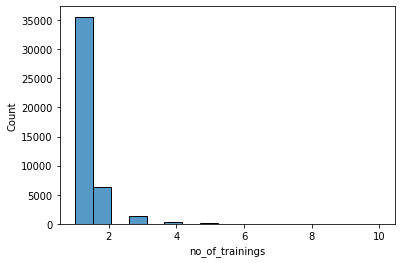

In [ ]:
### Ojo tiene valores extremos en sus mayores valores 
sns.histplot(data = X_train_num_imputed, x = 'no_of_trainings')

In [ ]:
print('Cantidad valores mayores a p99:')
print(X_train_num_imputed['no_of_trainings'][X_train_num_imputed['no_of_trainings']>4].count())
print('Cantidad  de todos los valores:')
print(X_train_num_imputed['no_of_trainings'].count())

Cantidad valores mayores a p99:
163
Cantidad  de todos los valores:
43846


<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

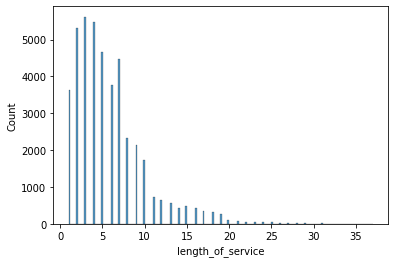

In [ ]:
sns.histplot(data = X_train_num_imputed, x = 'length_of_service')

In [ ]:
print('Cantidad valores mayores a p99:')
print(X_train_num_imputed['length_of_service'][X_train_num_imputed['length_of_service']>20].count())
print('Cantidad  de todos los valores:')
print(X_train_num_imputed['length_of_service'].count())

Cantidad valores mayores a p99:
414
Cantidad  de todos los valores:
43846


In [ ]:
print('Cantidad valores mayores a p99:')
print(X_train_num_imputed['length_of_service'][X_train_num_imputed['length_of_service']>29].count())
print('Cantidad  de todos los valores:')
print(X_train_num_imputed['length_of_service'].count())

Cantidad valores mayores a p99:
43
Cantidad  de todos los valores:
43846


In [ ]:
X_train_num_imputed.describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251471,34.805934,3.308398,5.871482,0.352894,0.023286,63.387150
std,0.609187,7.652666,1.214819,4.259109,0.477876,0.150812,13.374862
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
1%,1.000000,23.000000,1.000000,1.000000,0.000000,0.000000,44.000000
2.5%,1.000000,24.000000,1.000000,1.000000,0.000000,0.000000,46.000000
5%,1.000000,25.000000,1.000000,1.000000,0.000000,0.000000,47.000000
10%,1.000000,27.000000,1.000000,2.000000,0.000000,0.000000,48.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000


In [ ]:
### Ojo con las variables 'no_of_trainings', 'length_of_service' ###
X_train_num_imputed.describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99, 0.999])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251471,34.805934,3.308398,5.871482,0.352894,0.023286,63.387150
std,0.609187,7.652666,1.214819,4.259109,0.477876,0.150812,13.374862
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
90%,2.000000,46.000000,5.000000,11.000000,1.000000,0.000000,83.000000
95%,2.000000,51.000000,5.000000,15.000000,1.000000,0.000000,86.000000
97.5%,3.000000,55.000000,5.000000,18.000000,1.000000,0.000000,88.000000
99%,4.000000,58.000000,5.000000,20.000000,1.000000,1.000000,91.000000


<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

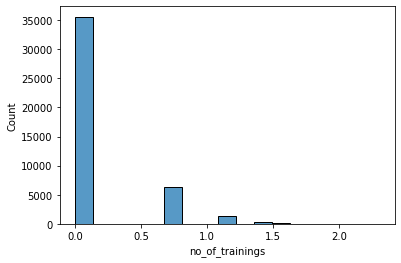

In [ ]:
sns.histplot(np.log(X_train_num_imputed['no_of_trainings']))

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

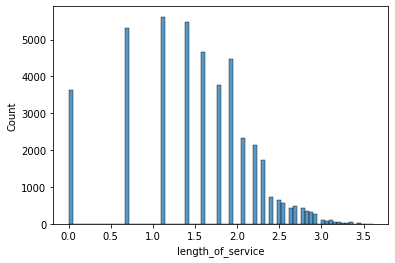

In [ ]:
sns.histplot(np.log(X_train_num_imputed['length_of_service']))

In [ ]:

p99 = np.percentile(X_train_num_imputed['no_of_trainings'], 99)
p999 = np.percentile(X_train_num_imputed['length_of_service'], 99.9)

In [ ]:
print(p99)
print(p999)

4.0
29.0


<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

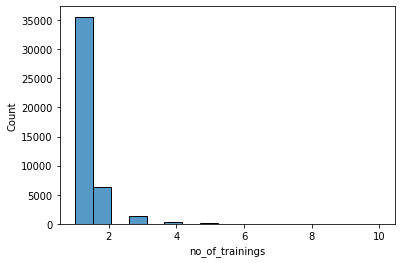

In [ ]:
sns.histplot(data = X_train_num_imputed, x = 'no_of_trainings')

`np.clip`

In [ ]:
X_train_num_imputed['no_of_trainings'] = np.clip(X_train_num_imputed['no_of_trainings'], None, p99)
X_train_num_imputed['length_of_service'] = np.clip(X_train_num_imputed['length_of_service'], None, p999)

Cambios en la distribución

<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

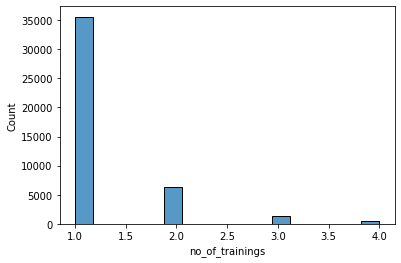

In [ ]:
sns.histplot(data = X_train_num_imputed, x = 'no_of_trainings')

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

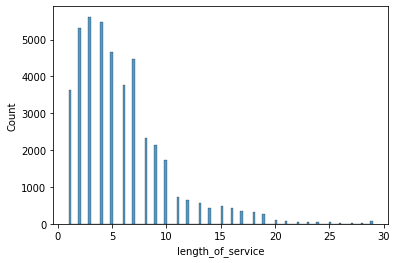

In [ ]:
sns.histplot(data = X_train_num_imputed, x = 'length_of_service')

In [ ]:
X_train_num_imputed['length_of_service'] = np.log(X_train_num_imputed['length_of_service'])

In [ ]:
X_train_num_imputed.describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.245382,34.805934,3.308398,1.519802,0.352894,0.023286,63.387150
std,0.567709,7.652666,1.214819,0.736318,0.477876,0.150812,13.374862
min,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000,39.000000
50%,1.000000,33.000000,3.000000,1.609438,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,1.945910,1.000000,0.000000,76.000000
90%,2.000000,46.000000,5.000000,2.397895,1.000000,0.000000,83.000000
95%,2.000000,51.000000,5.000000,2.708050,1.000000,0.000000,86.000000
97.5%,3.000000,55.000000,5.000000,2.890372,1.000000,0.000000,88.000000
99%,4.000000,58.000000,5.000000,2.995732,1.000000,1.000000,91.000000


## Consolidación

In [ ]:
X_train_cat_dummies.head(2)

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_train_num_imputed.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,31.0,3.0,1.386294,0.0,0.0,50.0
1,1.0,26.0,2.0,1.791759,0.0,0.0,77.0
2,2.0,28.0,5.0,1.098612,0.0,0.0,82.0
3,2.0,29.0,2.0,1.609438,0.0,0.0,58.0
4,1.0,48.0,1.0,2.890372,0.0,0.0,80.0


In [ ]:
X_train_cat_dummies.shape

(43846, 46)

In [ ]:
X_train_num_imputed.shape

(43846, 7)

`pd.concat`

In [ ]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1)
X_train_total.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,31.0,3.0,1.386294,0.0,0.0,50.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1.0,26.0,2.0,1.791759,0.0,0.0,77.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


Verificación nulos

In [ ]:
X_train_total.isnull().sum()

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_22                0
region_region_

##  Creación de nuevas variables

In [ ]:
X_train_total.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,31.0,3.0,1.386294,0.0,0.0,50.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1.0,26.0,2.0,1.791759,0.0,0.0,77.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_train_total['Indice_capa_añoTrabajo'] = X_train_total['no_of_trainings'] / (X_train_total['length_of_service']+1)

In [ ]:
X_train_total.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,Indice_capa_añoTrabajo
0,1.0,31.0,3.0,1.386294,0.0,0.0,50.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.419060
1,1.0,26.0,2.0,1.791759,0.0,0.0,77.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.358197


## Estandarización

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_total), columns = X_train_total.columns)

Comparación de distribuciones

<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

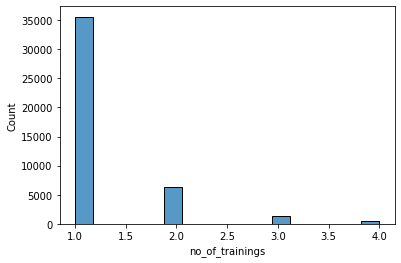

In [ ]:
sns.histplot(X_train_total['no_of_trainings'])

<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

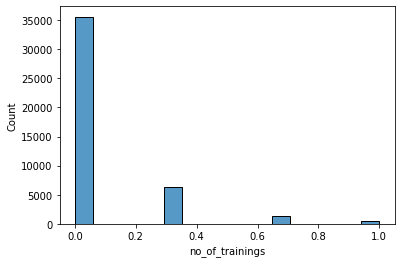

In [ ]:
sns.histplot(X_train_scaled['no_of_trainings'])

`describe`

In [ ]:
X_train_scaled.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,Indice_capa_añoTrabajo
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,...,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,0.081794,0.370148,0.577099,0.451342,0.352894,0.023286,0.406453,0.046093,0.043516,0.018998,...,0.012704,0.088104,0.012042,0.007777,0.014323,0.273092,0.702048,0.021233,0.423619,0.088362
std,0.189236,0.191317,0.303705,0.218667,0.477876,0.150812,0.222914,0.209689,0.204018,0.136520,...,0.111993,0.283449,0.109075,0.087846,0.118819,0.445553,0.457363,0.144163,0.494137,0.102115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.225000,0.500000,0.326260,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029297
50%,0.000000,0.325000,0.500000,0.477962,0.000000,0.000000,0.350000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.050407
75%,0.000000,0.475000,0.750000,0.577885,1.000000,0.000000,0.616667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.095900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_total.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,Indice_capa_añoTrabajo
0,1.0,31.0,3.0,1.386294,0.0,0.0,50.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.419060
1,1.0,26.0,2.0,1.791759,0.0,0.0,77.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.358197
2,2.0,28.0,5.0,1.098612,0.0,0.0,82.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.953011
3,2.0,29.0,2.0,1.609438,0.0,0.0,58.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0.766449
4,1.0,48.0,1.0,2.890372,0.0,0.0,80.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.257045


In [ ]:
X_train_scaled.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,Indice_capa_añoTrabajo
0,0.000000,0.275,0.50,0.411694,0.0,0.0,0.183333,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.050407
1,0.000000,0.150,0.25,0.532106,0.0,0.0,0.633333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.034267
2,0.333333,0.200,1.00,0.326260,0.0,0.0,0.716667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.192000
3,0.333333,0.225,0.25,0.477962,0.0,0.0,0.316667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.142527
4,0.000000,0.700,0.00,0.858366,0.0,0.0,0.683333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.007444


## Repetir todo el preprocesamiento para el conjunto de validación

In [ ]:
X_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
30828,Finance,region_28,Bachelor's,m,sourcing,1,31,5.0,5,1,0,55
51784,Operations,region_19,Bachelor's,m,sourcing,1,45,4.0,19,0,0,57
39658,Operations,region_2,Bachelor's,f,sourcing,1,30,4.0,9,0,0,55
74692,Technology,region_16,Bachelor's,m,sourcing,1,30,2.0,4,0,0,86
35025,Sales & Marketing,region_7,NaN,m,other,1,27,5.0,4,0,0,53


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 30828 to 12179
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            10962 non-null  object 
 1   region                10962 non-null  object 
 2   education             10465 non-null  object 
 3   gender                10962 non-null  object 
 4   recruitment_channel   10962 non-null  object 
 5   no_of_trainings       10962 non-null  int64  
 6   age                   10962 non-null  int64  
 7   previous_year_rating  10112 non-null  float64
 8   length_of_service     10962 non-null  int64  
 9   KPIs_met >80%         10962 non-null  int64  
 10  awards_won?           10962 non-null  int64  
 11  avg_training_score    10962 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ MB


Imputación de nulos

In [ ]:
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')

Numéricas

In [ ]:
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test_num), columns = X_test_num.columns)
X_test_num_imputed.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,31.0,5.0,5.0,1.0,0.0,55.0
1,1.0,45.0,4.0,19.0,0.0,0.0,57.0


Categóricas

In [ ]:
X_test_cat_imputed = pd.DataFrame(imputer_cat.transform(X_test_cat), columns = X_test_cat.columns)
X_test_cat_imputed.head(2)

,department,region,education,gender,recruitment_channel
0,Finance,region_28,Bachelor's,m,sourcing
1,Operations,region_19,Bachelor's,m,sourcing


Encoding

In [ ]:
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

Capeo de valores atípicos (con los obtenidos del train)

In [ ]:
X_test_num_imputed['no_of_trainings'] = np.clip(X_test_num_imputed['no_of_trainings'], None, p99)
X_test_num_imputed['length_of_service'] = np.clip(X_test_num_imputed['length_of_service'], None, p999)


In [ ]:
X_test_num_imputed.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000
mean,1.253695,34.795840,3.288816,5.838533,0.348294,0.022715,63.385149
std,0.574484,7.690453,1.214501,4.271062,0.476451,0.149000,13.358953
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,4.000000,60.000000,5.000000,29.000000,1.000000,1.000000,99.000000


In [ ]:
X_test_num_imputed['length_of_service'] = np.log(X_test_num_imputed['length_of_service'])

Consolidación

In [ ]:
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

In [ ]:
X_test_total['Indice_capa_añoTrabajo'] = X_test_total['no_of_trainings'] / (X_test_total['length_of_service']+1)

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_total), columns = X_test_total.columns)

Verificamos que ambas tengan la misma cantidad de columnas

In [ ]:
X_train_scaled.shape

(43846, 54)

# X_test_scaled.shape

Utilizaremos X_train_scaled, y_train
             X_test_scaled, y_test

## Balanceo de clases

Smote + Tomek

In [ ]:

from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all', random_state=seed)
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

In [ ]:
from collections import Counter
print ("Distribution antes resampling {}".format(Counter(y_train)))
print ("Distribution después resampling {}".format(Counter(y_smt)))

Distribution antes resampling Counter({0: 40112, 1: 3734})
Distribution después resampling Counter({0: 39745, 1: 39745})


# MODELAMIENTO

### MODELO CATBOOST

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_catboost = CatBoostClassifier()

model_catboost.fit(X_smt, y_smt)
 
score = model_catboost.score(X_smt,y_smt)
 
print("Metrica del modelo", score)

Learning rate set to 0.066737
0:	learn: 0.6325160	total: 29.2ms	remaining: 29.2s
1:	learn: 0.5796369	total: 56.5ms	remaining: 28.2s
2:	learn: 0.5446922	total: 81ms	remaining: 26.9s
3:	learn: 0.5095242	total: 106ms	remaining: 26.4s
4:	learn: 0.4861703	total: 130ms	remaining: 25.8s
5:	learn: 0.4634357	total: 160ms	remaining: 26.5s
6:	learn: 0.4456613	total: 185ms	remaining: 26.3s
7:	learn: 0.4275380	total: 212ms	remaining: 26.3s
8:	learn: 0.4097442	total: 237ms	remaining: 26.1s
9:	learn: 0.3995258	total: 277ms	remaining: 27.4s
10:	learn: 0.3862123	total: 307ms	remaining: 27.6s
11:	learn: 0.3724642	total: 336ms	remaining: 27.7s
12:	learn: 0.3661128	total: 360ms	remaining: 27.3s
13:	learn: 0.3582524	total: 388ms	remaining: 27.3s
14:	learn: 0.3534231	total: 413ms	remaining: 27.1s
15:	learn: 0.3438146	total: 438ms	remaining: 26.9s
16:	learn: 0.3394572	total: 462ms	remaining: 26.7s
17:	learn: 0.3350930	total: 499ms	remaining: 27.2s
18:	learn: 0.3291992	total: 536ms	remaining: 27.7s
19:	learn:

In [ ]:
#print(model_catboost.get_all_params())

### MODELO CATBOOST USANDO GRIDSEARCH

In [ ]:
#### OJO SE INTENTÓ CORRER EL MODELO CON GRIDSEARCH(OPTIMIZAR PARÁMETROS), PERO POR LA DEMORA EN EL TIEMPO DE ENTRENAMIENTO(MAS DE 2 HORAS APROX), 
### SOLO SE OPTO POR ANALIZAR MODELOS SIN USAR EL GRIDSEARCH, DEJO COMENTADO ELCODIGO A CORRER CON GRID SEARCH ######

#from sklearn.metrics import f1_score, make_scorer
#from sklearn.model_selection import GridSearchCV


#grid_list = {"learning_rate": [0.06, 0.1, 0.8],
#             "depth": [4, 6, 10],
#             "l2_leaf_reg": [1,3,7],
#             "model_size_reg":[0.3,0.5,0.8],
#             "iterations":[500, 1000, 1500]}


#grid_search = GridSearchCV(model_catboost, param_grid = grid_list, n_jobs = 4, cv = 5, scoring = 'roc_auc') #TAMBIEN EL SCORING QUE PUEDO QUE PUEDO ANALIZAR ES ('f1_micro')
#grid_search.fit(X_smt, y_smt) 
#print("grid search :{} ".format(grid_search.cv_results_))

In [ ]:
from sklearn import metrics
preds = model_catboost.predict(X_test_scaled)
preds_proba = model_catboost.predict_proba(X_test_scaled)[:,1]
score_pred = metrics.f1_score(y_test, preds)
score_auc_pred = metrics.roc_auc_score(y_test, preds)
print("Metrica f1_score en Test", score_pred)
print("Metrica roc_auc en Test", score_auc_pred)

Metrica f1_score en Test 0.517557251908397
Metrica roc_auc en Test 0.6796326815964551


In [ ]:
print(preds.shape)
print(y_test.shape)

(10962,)
(10962,)


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def mostrar_resultados(y_test, xgboost_predictions):
    Matriz_Confusion = confusion_matrix(y_test, xgboost_predictions)
    plt.figure(figsize=(8, 8))
    sns.heatmap(Matriz_Confusion, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='BrBG',linewidths = 0.5);
    plt.title("Matriz de confusión")
    plt.ylabel('Actual')
    plt.xlabel('Predicha')
    plt.show()
    print (classification_report(y_test, xgboost_predictions))

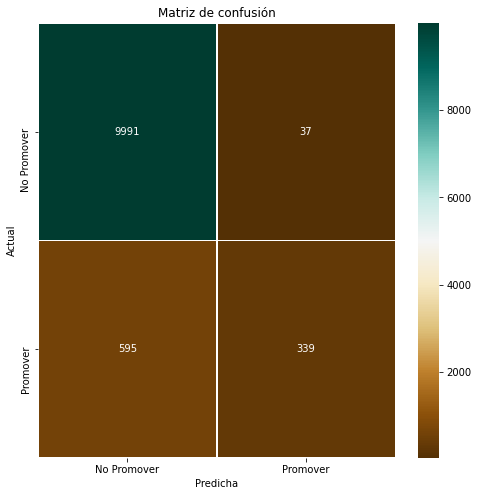

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.90      0.36      0.52       934

    accuracy                           0.94     10962
   macro avg       0.92      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [ ]:
mostrar_resultados(y_test,preds)

In [ ]:
def plot_roc_curve(y_test, preds):  
    plt.plot(y_test, preds, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

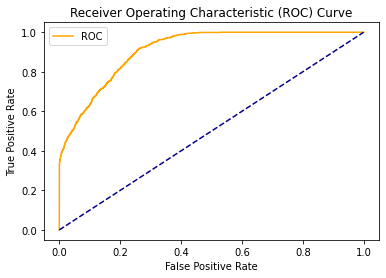

In [ ]:
from sklearn.metrics import roc_curve  
fpr, tpr, thresholds = roc_curve(y_test, preds_proba)
 
plot_roc_curve(fpr, tpr) 

In [ ]:
#Feature Importances Plot
def feature_importances_plot(regr, X_train_scaled):
    features = X_train_scaled.columns
    importances = regr.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [ ]:
catboost_feature =model_catboost.get_feature_importance()
catboost_feature

array([5.58811872e+00, 1.26021702e+01, 1.72437882e+01, 2.26964508e+01,
       7.53237863e+00, 9.68775981e-01, 1.28314138e+01, 5.62311667e-01,
       2.73476303e-01, 1.10224300e-01, 2.49891596e+00, 2.28265887e+00,
       1.24193493e-01, 3.13598421e+00, 7.06534818e-01, 2.88832982e-02,
       6.20048257e-02, 2.17013728e-02, 2.49627898e-02, 2.12584598e-02,
       5.05083535e-02, 4.73296364e-02, 5.49305879e-02, 1.36252573e-03,
       2.76327513e-02, 2.90528967e-01, 1.11734683e-01, 1.90718706e-02,
       2.84863688e-01, 4.44130889e-02, 2.80618810e-02, 4.40951819e-02,
       1.20278114e-01, 4.03665453e-02, 5.41640164e-02, 7.90139387e-02,
       1.59441688e-02, 3.79283109e-02, 5.55160287e-02, 3.70473139e-02,
       1.56262814e-02, 1.79828435e-02, 7.95618393e-02, 5.34214643e-02,
       4.15971816e-02, 2.48432372e-01, 3.10034871e-02, 3.70536391e-02,
       4.13784751e-02, 1.43197632e+00, 1.76196628e+00, 2.20277723e-01,
       1.56496172e+00, 3.69376208e+00])

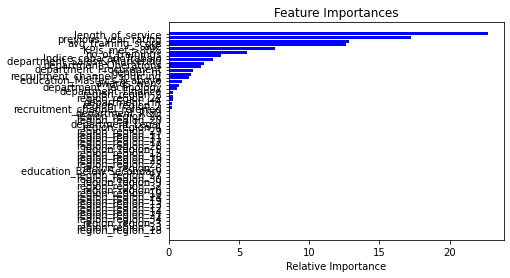

In [ ]:
feature_importances_plot(model_catboost,X_smt)

In [ ]:
importances = pd.DataFrame({'columna': X_smt.columns, 'importance_cat': catboost_feature})
importances.sort_values(by = 'importance_cat', ascending = False)

,columna,importance_cat
3,length_of_service,22.696451
2,previous_year_rating,17.243788
6,avg_training_score,12.831414
1,age,12.602170
4,KPIs_met >80%,7.532379
0,no_of_trainings,5.588119
53,Indice_capa_añoTrabajo,3.693762
13,department_Sales & Marketing,3.135984
10,department_Operations,2.498916
11,department_Procurement,2.282659


# MODELO ADABOOST

Metrica del modelo 0.8380047804755315
Metrica f1_score en Test 0.35435630689206765
Metrica roc_auc en Test 0.7121288443749364


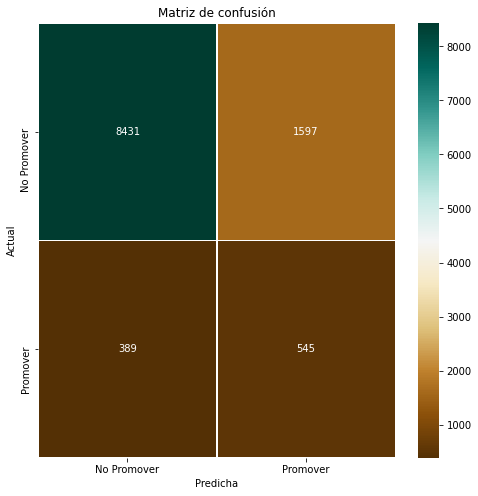

              precision    recall  f1-score   support

           0       0.96      0.84      0.89     10028
           1       0.25      0.58      0.35       934

    accuracy                           0.82     10962
   macro avg       0.61      0.71      0.62     10962
weighted avg       0.90      0.82      0.85     10962



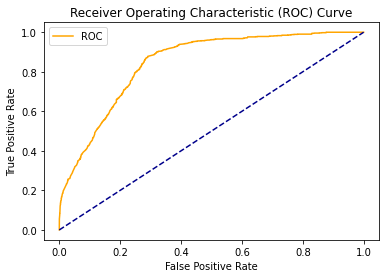

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier()

model_adaboost.fit(X_smt, y_smt)

score = model_adaboost.score(X_smt,y_smt)
print("Metrica del modelo", score)


preds_adaboost = model_adaboost.predict(X_test_scaled)
preds_proba_adaboost = model_adaboost.predict_proba(X_test_scaled)[:,1]

score_pred = metrics.f1_score(y_test, preds_adaboost)
score_auc_pred = metrics.roc_auc_score(y_test, preds_adaboost)
print("Metrica f1_score en Test", score_pred)
print("Metrica roc_auc en Test", score_auc_pred)

mostrar_resultados(y_test,preds_adaboost)
 


fpr, tpr, thresholds = roc_curve(y_test, preds_proba_adaboost)
 
plot_roc_curve(fpr, tpr)  

In [ ]:
print(model_adaboost.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


# MODELO DECISIONTREE Y BALANCEO CON BAGGING

Metrica del modelo 0.8787802764220225
Metrica f1_score en Test 0.4059625753250872
Metrica roc_auc en Test 0.7638828624604854


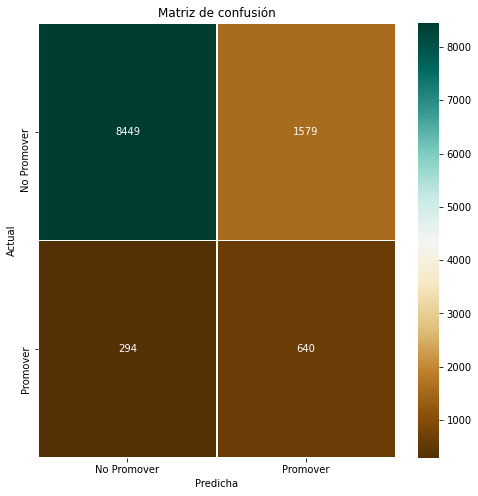

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     10028
           1       0.29      0.69      0.41       934

    accuracy                           0.83     10962
   macro avg       0.63      0.76      0.65     10962
weighted avg       0.91      0.83      0.86     10962



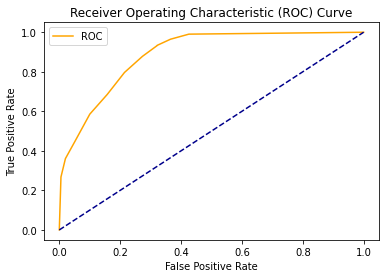

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model_bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)


model_bbc.fit(X_train_scaled, y_train)

score = model_bbc.score(X_train_scaled,y_train)
print("Metrica del modelo", score)


preds_bbc = model_bbc.predict(X_test_scaled)
preds_proba_bbc = model_bbc.predict_proba(X_test_scaled)[:,1]

score_pred = metrics.f1_score(y_test, preds_bbc)
score_auc_pred = metrics.roc_auc_score(y_test, preds_bbc)
print("Metrica f1_score en Test", score_pred)
print("Metrica roc_auc en Test", score_auc_pred)

mostrar_resultados(y_test,preds_bbc)
 


fpr, tpr, thresholds = roc_curve(y_test, preds_proba_bbc)
 
plot_roc_curve(fpr, tpr)  

In [ ]:
import joblib
joblib.dump(model_catboost, 'm_entrenado_catboost1.pkl')

['m_entrenado_catboost1.pkl']

In [ ]:
m_catboost = joblib.load('m_entrenado_catboost1.pkl')

In [ ]:
# Importamos datos a validar para enviar
df_val= pd.read_csv("D:\\ANGEL\\DMC\\Machine Learning Advanced\\MACHINE LEARNING ADVANCED _VIVO\\test.csv", sep = ",",index_col=0)
df_val.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.3+ MB


In [ ]:
df_val.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [ ]:
X_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,40572.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251471,34.805934,3.333284,5.871482,0.352894,0.023286,63.387150
std,0.609187,7.652666,1.259597,4.259109,0.477876,0.150812,13.374862
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


Imputación

In [ ]:
df_val_cat = df_val.select_dtypes('object')
df_val_num = df_val.select_dtypes('number')

Numéricas

In [ ]:
df_val_num_imputed = pd.DataFrame(imputer_num.transform(df_val_num), columns = df_val_num.columns)
df_val_num_imputed.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,24.0,3.0,1.0,1.0,0.0,77.0
1,1.0,31.0,3.0,5.0,0.0,0.0,51.0


Categóricas

In [ ]:
df_val_cat_imputed = pd.DataFrame(imputer_cat.transform(df_val_cat), columns = df_val_cat.columns)
df_val_cat_imputed.head(2)

,department,region,education,gender,recruitment_channel
0,Technology,region_26,Bachelor's,m,sourcing
1,HR,region_4,Bachelor's,f,other


Encoding

In [ ]:
df_val_cat_dummies = pd.get_dummies(df_val_cat_imputed, drop_first=True)

In [ ]:
df_val_num_imputed['no_of_trainings'] = np.clip(df_val_num_imputed['no_of_trainings'], None, p99)
df_val_num_imputed['length_of_service'] = np.clip(df_val_num_imputed['length_of_service'], None, p999)

In [ ]:
df_val_num_imputed['length_of_service'] = np.log(df_val_num_imputed['length_of_service'])

Consolidación

In [ ]:
df_val_total = pd.concat([df_val_num_imputed, df_val_cat_dummies], axis = 1)

In [ ]:
df_val_total['Indice_capa_añoTrabajo'] = df_val_total['no_of_trainings'] / (df_val_total['length_of_service']+1)

In [ ]:
df_val_scaled = pd.DataFrame(scaler.transform(df_val_total), columns = df_val_total.columns)

In [ ]:
X_train_scaled.shape

(43846, 54)

In [ ]:
df_val_scaled.shape

(23490, 54)

In [ ]:
para_enviar = m_catboost.predict(df_val_scaled)
para_enviar

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
data_enviar1 = pd.DataFrame()
data_enviar1['is_promoted'] = para_enviar
data_enviar1.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [ ]:
data_enviar1.index.names = ['employee_id']
data_enviar1.head()

,is_promoted
employee_id,
0,0
1,0
2,0
3,0
4,0


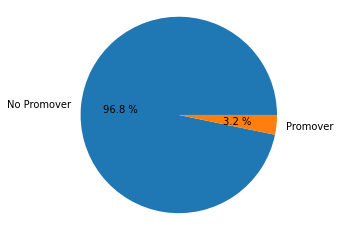

In [ ]:
plt.pie(pd.value_counts(data_enviar1['is_promoted']), labels=LABELS, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [ ]:
data_enviar1.to_csv("D:\\ANGEL\\DMC\\Machine Learning Advanced\\MACHINE LEARNING ADVANCED _VIVO\\submission1.csv")

# CONCLUSIONES

*Se entrenó 3 modelos de los cuales al comparar la metrica roc_auc el mejor modelo sería MODELO DECISIONTREE Y BALANCEO CON BAGGING
(Metrica roc_auc en Test 0.7638828624604854)
*Se entrenó 3 modelos de los cuales al comparar la metrica f1_score el mejor modelo sería MODELO CATBOOST
(Metrica f1_score en Test 0.517557251908397)
*La precisión(bueno o malo al predecir si ascendemos o no a tal empleado) en la predicción de nuestros datos futuros del area de Recursos Humanos,
no es tan bueno ya que estariamos cometiendo algunos errores se estaría cometiendo mucho error, es decir estariamos ascendiente al quien realmente 
no es capaz o no merece ser ascendido y por otro lado al quien si realmente merece ser ascendido no lo estariamos ascendiendo.
*Necesitamosa añadir variables relevantes para nuestros datos que de seguro estarian mejorando la predicción del modelo